#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
# Load Original dataset
#Add you Path.
df = pd.read_csv('Salaries.csv')

# # You can Also The load Cleaned dataset
# df = pd.read_csv('Final_modified_salaries.csv')

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Good Luck!

# Task 1


*Basic Data Exploration :*

In [4]:
print (f"The shape of the data is : {df.shape}")


print(df.iloc[4])
print()
print()

print ("The Columns Type is : ")
for col in df.columns:
    print(f" {col}  type is                : {type(df[col][0])}")

The shape of the data is : (148654, 13)
Id                                                             5
EmployeeName                                     PATRICK GARDNER
JobTitle            DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
BasePay                                                 134401.6
OvertimePay                                               9737.0
OtherPay                                               182234.59
Benefits                                                     NaN
TotalPay                                               326373.19
TotalPayBenefits                                       326373.19
Year                                                        2011
Notes                                                        NaN
Agency                                             San Francisco
Status                                                       NaN
Name: 4, dtype: object


The Columns Type is : 
 Id  type is                : <class 'numpy.int64'>
 EmployeeName  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


# Task 2

*Descriptive Statistics :*

In [6]:
print ("Number of NULL value : ")
df.isnull().sum()

Number of NULL value : 


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [8]:
print ("standard deviation :")
for col in df.columns:
    if df[col].dtype == np.float64:
        print(col + " : " + str(df[col].std()))

standard deviation :
BasePay : 42764.63549525958
OvertimePay : 11454.380558676425
OtherPay : 8056.601865589484
Benefits : 15402.215857867235
TotalPay : 50517.005273949944
TotalPayBenefits : 62793.53348323814
Notes : nan
Status : nan


# Task 3 
*Data Cleaning :*

In [9]:
#droping empty columns
#we can drop Agency column because it has the same value for all row but we will keep it right now
df = df.drop(columns = ['Notes' , 'Status'])

In [10]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


In [12]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [13]:
df['JobTitle'].nunique()

2159

In [14]:
df.iloc[13797]

Id                                                    13798
EmployeeName                                   Not Provided
JobTitle            PUBLIC SAFETY COMMUNICATIONS DISPATCHER
BasePay                                            57963.39
OvertimePay                                        19683.91
OtherPay                                            4373.86
Benefits                                                NaN
TotalPay                                           82021.16
TotalPayBenefits                                   82021.16
Year                                                   2011
Agency                                        San Francisco
Name: 13797, dtype: object

In [15]:
salesman_salary_mean = df.loc[(df['JobTitle'] == 'Not provided') , 'JobTitle'].count()
salesman_salary_mean

4

In [16]:
df.shape

(148654, 11)

In [17]:
#removeing rubish data where JobTitle is not provided           note: we dont care about name is not provided
df = df[df['JobTitle'] != 'Not provided']

In [18]:
df.shape

(148650, 11)

In [19]:
df.tail(25)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148625,148626,Renato C Gurion,Registered Nurse,0.0,0.0,6.00,1.24,6.00,7.24,2014,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148630,148631,Randy J Keys,Carpenter,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148631,148632,Andre M Johnson,Communications Dispatcher 1,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148632,148633,Sharon D Owens-Webster,Protective Services Worker,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148633,148634,Edward Ferdinand,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148634,148635,David M Turner,Transit Car Cleaner,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


In [20]:
#the last 24 row is completly 0 and that make no scence
df = df[df['Id'] < 148627]

In [21]:
print (df.shape)
df.tail(5)

(148626, 11)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148621,148622,Kenneth Mackey,Transit Operator,0.0,0.0,15.35,0.00,15.35,15.35,2014,San Francisco
148622,148623,Jacqueline Hubbard,Senior Clerk,0.0,0.0,13.77,0.00,13.77,13.77,2014,San Francisco
148623,148624,Deborah B Honig,Attorney (Civil/Criminal),0.0,0.0,13.35,0.13,13.35,13.48,2014,San Francisco
148624,148625,Lorraine Rosenthal,Senior Clerk,0.0,0.0,12.89,0.00,12.89,12.89,2014,San Francisco
148625,148626,Renato C Gurion,Registered Nurse,0.0,0.0,6.00,1.24,6.00,7.24,2014,San Francisco


In [22]:
print ("Number of NULL value : ")
df.isnull().sum()

Number of NULL value : 


Id                      0
EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [23]:
df[df['BasePay'].isnull()].head(15)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,San Francisco
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,San Francisco
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,San Francisco
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,San Francisco
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco
90811,90812,Edward M Harrington,Executive Contract Employee,NaN,0.0,105105.00,0.00,105105.00,105105.00,2013,San Francisco
91203,91204,Spencer J Gregory,Inspector 3,NaN,0.0,103727.48,0.00,103727.48,103727.48,2013,San Francisco
92260,92261,Derek Kerr,Senior Physician Specialist,NaN,0.0,100000.00,0.00,100000.00,100000.00,2013,San Francisco
97418,97419,Kevin M Martin,Police Officer 3,NaN,0.0,80687.72,0.00,80687.72,80687.72,2013,San Francisco
98573,98574,James M Blake,"Battalion Chief, Fire Suppress",NaN,0.0,74562.89,0.00,74562.89,74562.89,2013,San Francisco


In [24]:
#first we fill the null value of the BasePay with the mean of the BasePay for
#the same JobTitle and the same OverTimePay to get the best value to fill with
df['BasePay'] = df.groupby(['JobTitle', 'OvertimePay'])['BasePay'].transform(lambda x: x.fillna(x.mean()))

In [25]:
print ("Number of NULL value : ")
df.isnull().sum()

Number of NULL value : 


Id                      0
EmployeeName            0
JobTitle                0
BasePay                10
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [26]:
#we still have 10 null value so we fill them with the mean of the BasePay for the same jobTitle
df['BasePay'] = df.groupby('JobTitle')['BasePay'].transform(lambda x: x.fillna(x.mean()))

In [27]:
print ("Number of NULL value : ")
df.isnull().sum()

Number of NULL value : 


Id                      0
EmployeeName            0
JobTitle                0
BasePay                 4
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [28]:
df[df['BasePay'].isnull()].head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
102303,102304,Robert E Evans,"Captain, (Fire Department)",NaN,0.0,35332.78,0.00,35332.78,35332.78,2013,San Francisco
106902,106903,Catherine A Dukes,Public Safety Comm Tech,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,San Francisco
106909,106910,Margot Gibney,Drug Court Coordinator,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,San Francisco
106963,106964,Hiedi L Antoine,IS Technician Assistant,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,San Francisco


In [29]:
#after looking on this 4 null value and looking on the data we decide to fill them with this value and delete the 
#Public Safety Comm Tech row because of the lack of information

df = df[df['Id'] != 106903]
df.loc[df['Id'] == 102304, 'BasePay'] = 168692
df.loc[df['Id'] == 106910, 'BasePay'] = 140000
df.loc[df['Id'] == 106964, 'BasePay'] = 34767.3
print ("Number of NULL value : ")
df.isnull().sum()

Number of NULL value : 


Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [30]:
# we find that the Benefits is less than the BasePay in most cases and it is not the best fill if we fill with
# the mean of all the Benefits, so we calculate the mean of the Benefits where the BasePay is in range -10000,10000 of the
# BasePay of the row that contain the null Benefits value

# function to calculate the mean of "Benefits" within the specified range:
def mean_within_range(row):
    if pd.isnull(row['Benefits']):
        lower_bound = row['BasePay'] - 1000
        upper_bound = row['BasePay'] + 1000
        mean_benefits = df[(df['BasePay'] >= lower_bound) & (df['BasePay'] <= upper_bound)]['Benefits'].mean()
        return mean_benefits
    else:
        return row['Benefits']

# fill the null value
df['Benefits'] = df.apply(mean_within_range, axis=1)

In [31]:
print ("Number of NULL value : ")
df.isnull().sum()

Number of NULL value : 


Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148625 entries, 0 to 148625
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148625 non-null  int64  
 1   EmployeeName      148625 non-null  object 
 2   JobTitle          148625 non-null  object 
 3   BasePay           148625 non-null  float64
 4   OvertimePay       148625 non-null  float64
 5   OtherPay          148625 non-null  float64
 6   Benefits          148625 non-null  float64
 7   TotalPay          148625 non-null  float64
 8   TotalPayBenefits  148625 non-null  float64
 9   Year              148625 non-null  int64  
 10  Agency            148625 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [33]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148625.000000,148625.000000,148625.000000,148625.000000,148625.000000,148625.000000,148625.000000,148625.000000
mean,74313.280727,66236.390220,5066.912041,3649.385210,24814.919124,74782.915072,93710.786892,2012.522362
std,42904.835953,42767.211909,11455.155422,8057.138397,15088.522525,50511.128820,62786.088177,1.117462
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,0.000000,-33.890000,2011.000000
25%,37157.000000,33431.500000,0.000000,0.000000,11855.510000,36190.200000,44125.950000,2012.000000
50%,74313.000000,64938.080000,0.000000,812.230000,28601.680000,71432.670000,92416.810000,2013.000000
75%,111470.000000,94681.750000,4658.840000,4237.530000,35186.875874,105848.080000,132884.120000,2014.000000
max,148626.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [34]:
df.reset_index(drop = True , inplace = True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,54153.073127,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,49050.047027,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,60573.404762,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,30365.269241,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,45671.649042,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148620,148622,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.000000,15.35,15.35,2014,San Francisco
148621,148623,Jacqueline Hubbard,Senior Clerk,0.00,0.00,13.77,0.000000,13.77,13.77,2014,San Francisco
148622,148624,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.130000,13.35,13.48,2014,San Francisco
148623,148625,Lorraine Rosenthal,Senior Clerk,0.00,0.00,12.89,0.000000,12.89,12.89,2014,San Francisco


In [35]:
print(df['JobTitle'].nunique())

print(df[df['JobTitle'].str.contains('POLICE OFFICER', case=False)]['JobTitle'].unique())

2157
['POLICE OFFICER III' 'POLICE OFFICER I' 'POLICE OFFICER II'
 'INSTITUTIONAL POLICE OFFICER' 'Police Officer 3' 'Police Officer 2'
 'Police Officer' 'Institutional Police Officer']


In [36]:
#There is muny different way of inputing the data. some in Lower case letters and other with Upper.
df['JobTitle'] = df['JobTitle'].str.upper()

In [37]:
#there is a different way of inputting the numbers. Some in Latin way and other in Roman way
def replace_roman_numerals(title):
    roman_to_arabic = {
        'IV': '4',
        'III': '3',
        'II': '2',
        'I': '1'
    }
    
    for roman, arabic in roman_to_arabic.items():
        title = re.sub(rf'\b{roman}\b', arabic, title)
    
    return title

df['JobTitle'] = df['JobTitle'].apply(replace_roman_numerals)

In [38]:
print(df['JobTitle'].nunique())

print(df[df['JobTitle'].str.contains('POLICE OFFICER', case=False)]['JobTitle'].unique())

1532
['POLICE OFFICER 3' 'POLICE OFFICER 1' 'POLICE OFFICER 2'
 'INSTITUTIONAL POLICE OFFICER' 'POLICE OFFICER']


 And now the data is more clean and look better (:                                                                                
There still some spesific case that is not clead what to do like "PR ADMINISTRATIVE ANALYST" , "PRINCIPAL ADMINISTRATIVE ANALYST" and some other example.                                                                                                  
So with not sure about changing it to be the same or keep it like that i decided to keep it until i get more information (:

In [39]:
if not os.path.exists('YourPath\Final_modified_salaries.csv'):
    df.to_csv('YourPath\Final_modified_salaries.csv', index=False)

# Task 4
*Basic Data Visualization :*

In [40]:
df.head(0)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


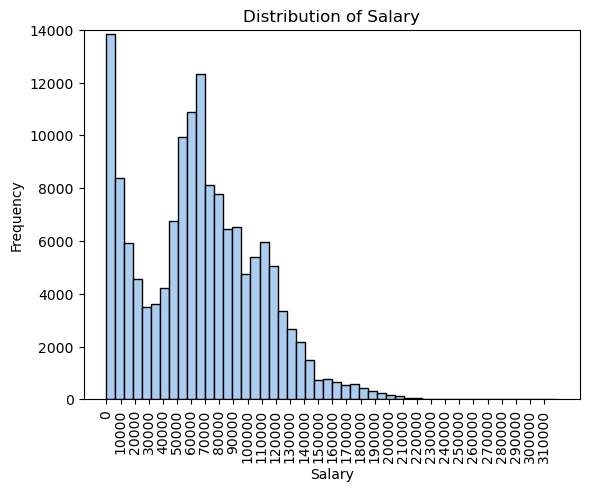

In [42]:
plt.style.use('default')

plt.hist(df.BasePay, bins=50, color='#abcdef', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

plt.xticks(range(0, int(df.BasePay.max()), 10000) , rotation='vertical')
plt.ylim(0, 14000)

plt.savefig('YourPath/Salary_distribution.png' ,  bbox_inches='tight')

plt.show()

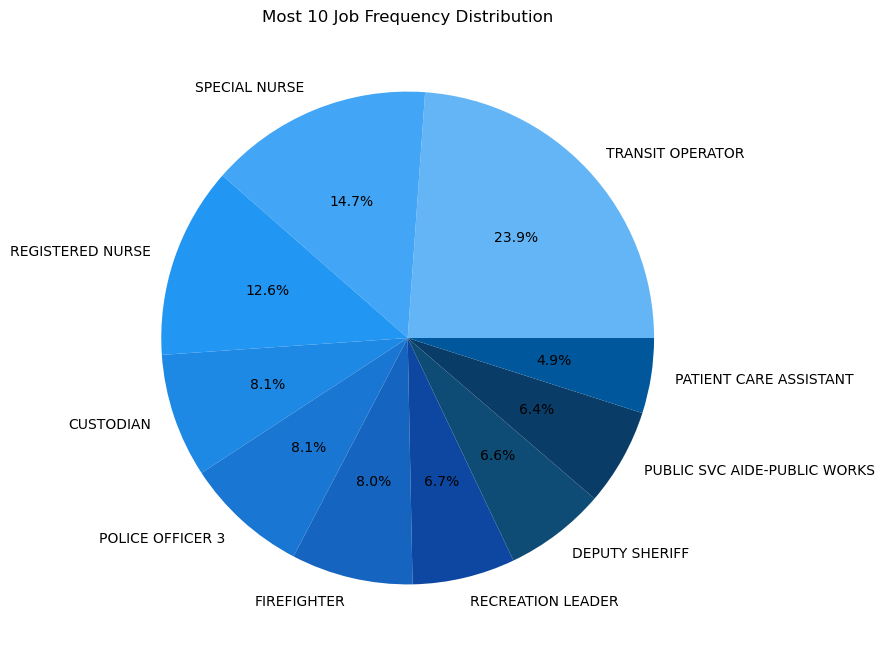

In [43]:
job_title_counts = df['JobTitle'].value_counts()

top_job_titles = job_title_counts.head(10)

colors = ["#64B5F6", "#42A5F5", "#2196F3", "#1E88E5", "#1976D2", "#1565C0", "#0D47A1", "#0F4C75", "#0A3C68", "#01579B"]

plt.figure(figsize=(8, 8))
plt.pie(top_job_titles, labels=top_job_titles.index, autopct='%1.1f%%' , colors = colors)
plt.title('Most 10 Job Frequency Distribution')

plt.savefig('YourPath/top_job_titles_distribution.png' ,  bbox_inches='tight')

plt.show()


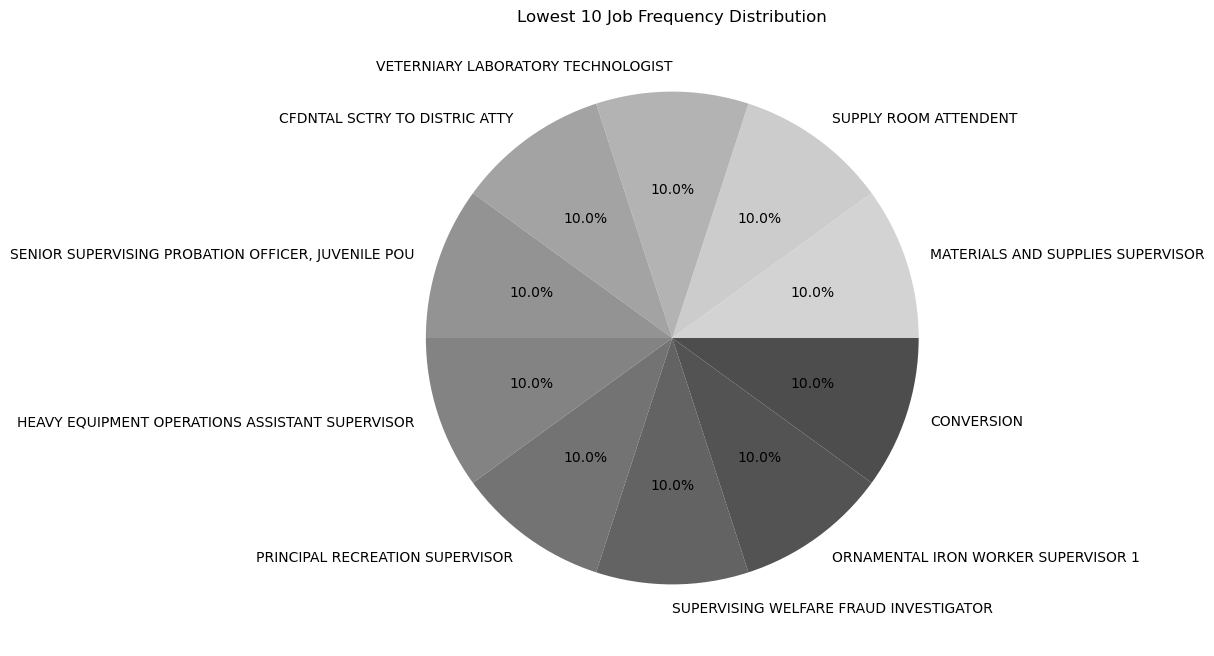

In [44]:
job_title_counts = df['JobTitle'].value_counts()

lowest_job_titles = job_title_counts.tail(10)

#colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightpink', 'lightblue', 'yellow', 'cyan', 'magenta']
colors = ['#D3D3D3', '#CCCCCC', '#B3B3B3', '#A3A3A3', '#939393', '#838383', '#737373', '#636363', '#535353', '#4D4D4D']

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(lowest_job_titles, labels=lowest_job_titles.index, autopct='%1.1f%%' , colors = colors)
plt.title('Lowest 10 Job Frequency Distribution')
plt.show()

# Task 5 
*Grouped Analysis :*

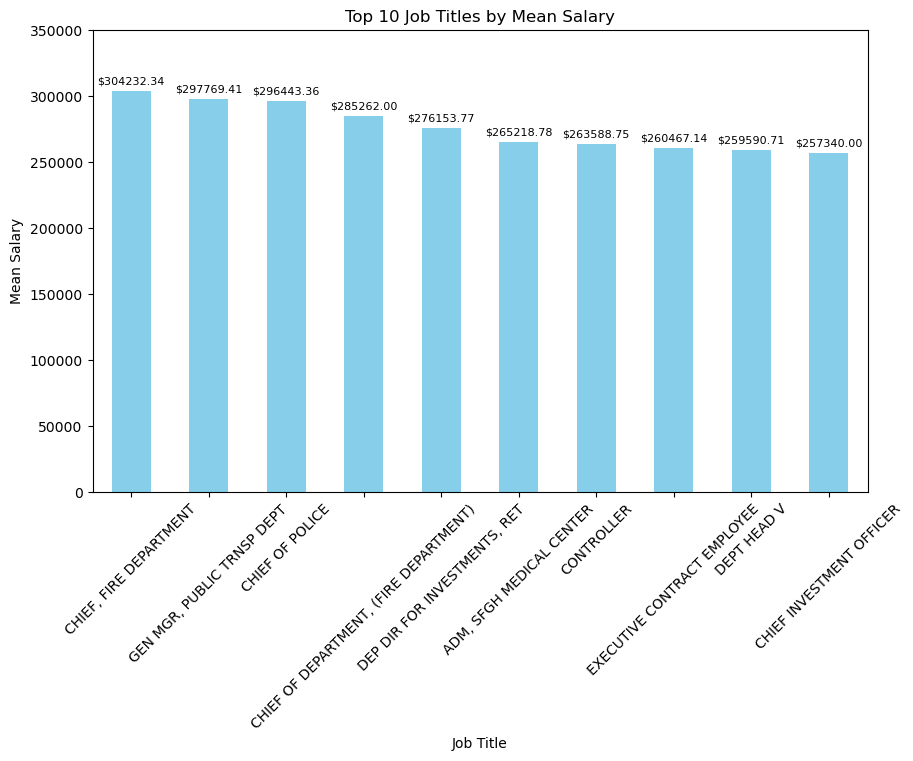

In [45]:
mean_salary_by_jobtitle = df.groupby('JobTitle')['BasePay'].mean()

top_10_mean_salaries = mean_salary_by_jobtitle.nlargest(10)

# Plot the top 10 mean salaries in a bar plot
plt.figure(figsize=(10, 6))
bar_plot = top_10_mean_salaries.plot(kind='bar', color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Job Titles by Mean Salary')

# Rotate x-axis labels vertically
plt.xticks(rotation=45)
plt.ylim(0, 350000)

# Add salary above each bar
for i, v in enumerate(top_10_mean_salaries):
    plt.text(i, v + 5000, f"${v:.2f}", ha='center', fontsize=8)


plt.savefig('YourPath/Salary_to_Top_JobTitle.png' ,  bbox_inches='tight')    
    
plt.show()


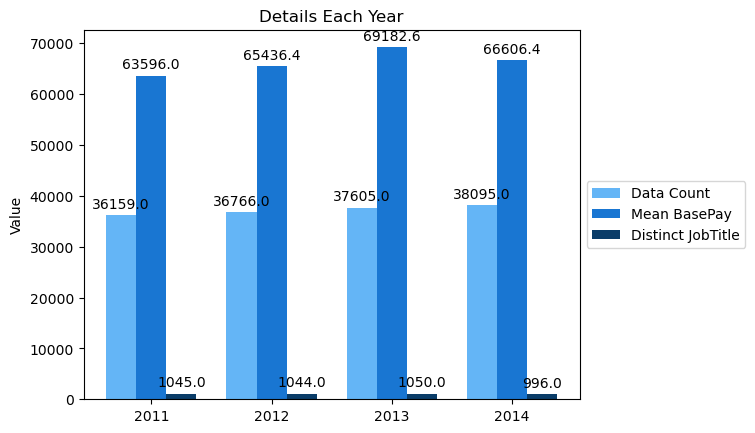

In [46]:
years = df['Year'].drop_duplicates().sort_values()
data_counts = df.groupby('Year').size()
mean_basepay = df.groupby('Year')['BasePay'].mean()
distinct_jobtitle = df.groupby('Year')['JobTitle'].nunique()


x = np.arange(len(years))
width = 0.25
multiplier = 0

fig, ax = plt.subplots()

# Plot the bars
bar1 = ax.bar(x - width, data_counts, width, label='Data Count' , color='#64B5F6')
bar2 = ax.bar(x, mean_basepay, width, label='Mean BasePay' , color='#1976D2')
bar3 = ax.bar(x + width, distinct_jobtitle, width, label='Distinct JobTitle' , color='#0A3C68')


ax.set_ylabel('Value')
ax.set_title('Details Each Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add the value of each column above the bars
for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

        
plt.savefig('YourPath/Details_Each_Year.png' ,  bbox_inches='tight')   
        
plt.show()


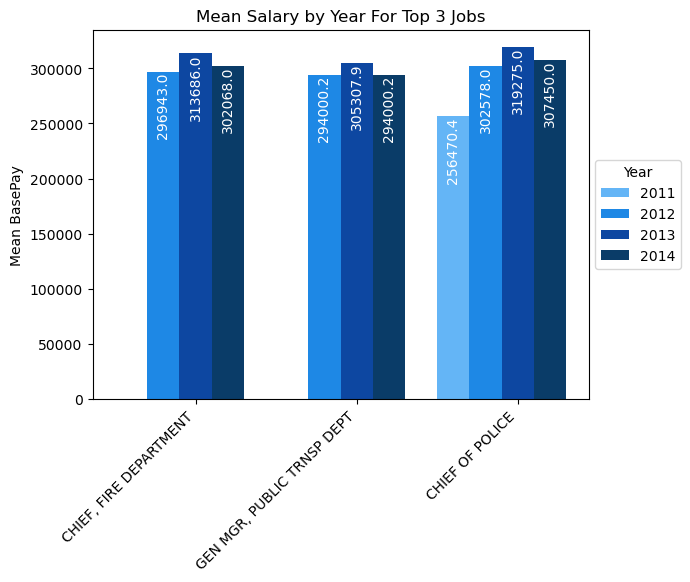

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
years = df['Year'].drop_duplicates().sort_values()
job_titles = ["CHIEF, FIRE DEPARTMENT", "GEN MGR, PUBLIC TRNSP DEPT", "CHIEF OF POLICE"]

fig, ax = plt.subplots()

# Set the width of each bar and the number of years
width = 0.2
num_years = len(years)

#"#0A3C68",
colors = ["#64B5F6","#1E88E5", "#0D47A1", "#0A3C68"]
num_of_colors = 0

# Iterate over each year
for i, year in enumerate(years):
    mean_basepay = df[df['Year'] == year].groupby('JobTitle')['BasePay'].mean().reindex(job_titles, fill_value=0)
    x = np.arange(len(job_titles)) + (i - num_years / 2) * width

    # Plot the bars for each year
    bars = ax.bar(x, mean_basepay, width, label=year , color = colors[num_of_colors])
    num_of_colors += 1;

    # Add the value of each column above the bars
    for rect in bars:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),                    
                    textcoords="offset points",
                    ha='center', va='top',
                    rotation=90
                    ,color='white')
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean BasePay')
ax.set_title('Mean Salary by Year For Top 3 Jobs')
ax.set_xticks(np.arange(len(job_titles)))
ax.set_xticklabels(job_titles, rotation=45, ha="right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Year')


plt.savefig('YourPath/Mean_Salary_by_Year_For_Top_3_Jobs.png' ,  bbox_inches='tight')   

plt.show()


# Task 6
*Simple Correlation Analysis :*

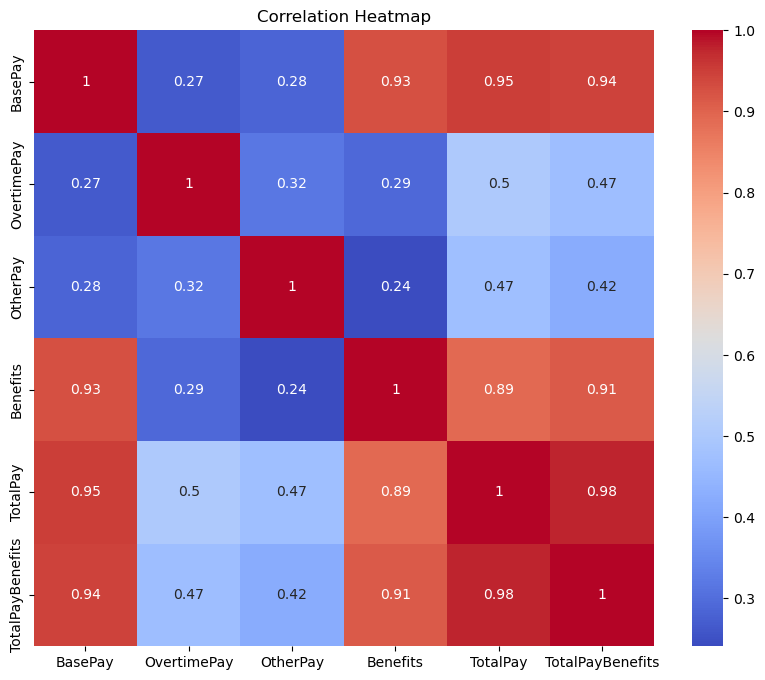

In [48]:
import seaborn as sns

float_features = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].select_dtypes(include='float64')
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(float_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We find that the BasePay (Salary) has a Strong Correlation with Benefits.                                                        
There is a of course a Correlation with the TotalPay (BasePay + OvertimePay + OtherPay) ,                                        
and with TotalPayBenefits (TotalPay + Benefits).

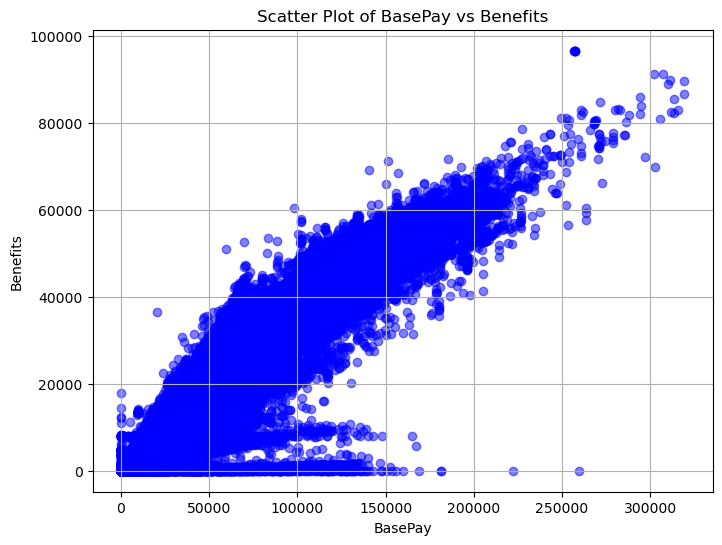

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BasePay'], df['Benefits'], alpha=0.5, color='b')
plt.title('Scatter Plot of BasePay vs Benefits')
plt.xlabel('BasePay')
plt.ylabel('Benefits')
plt.grid(True)
plt.show()

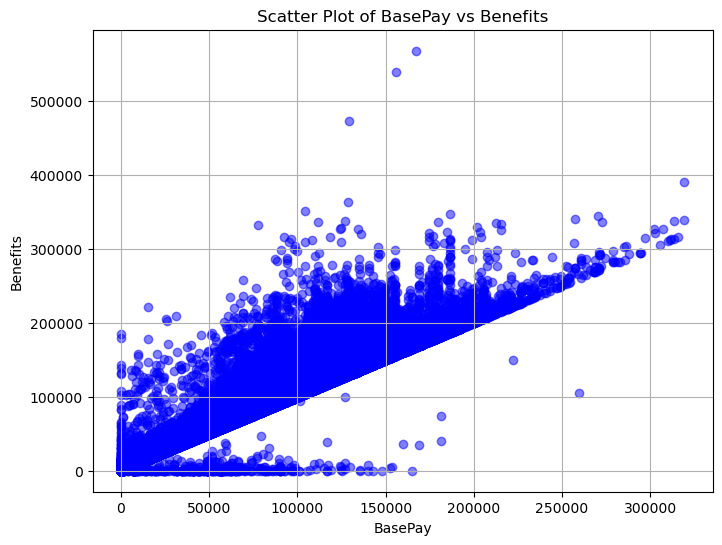

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BasePay'], df['TotalPay'], alpha=0.5, color='b')
plt.title('Scatter Plot of BasePay vs Benefits')
plt.xlabel('BasePay')
plt.ylabel('Benefits')
plt.grid(True)
plt.show()

# Task 7
*Summary of Insights :*

You can read the report on the github : https://github.com/hamzehRom/Salary_Analysis